<a href="https://colab.research.google.com/github/egorik3z/ML/blob/master/ML21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import operator

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)


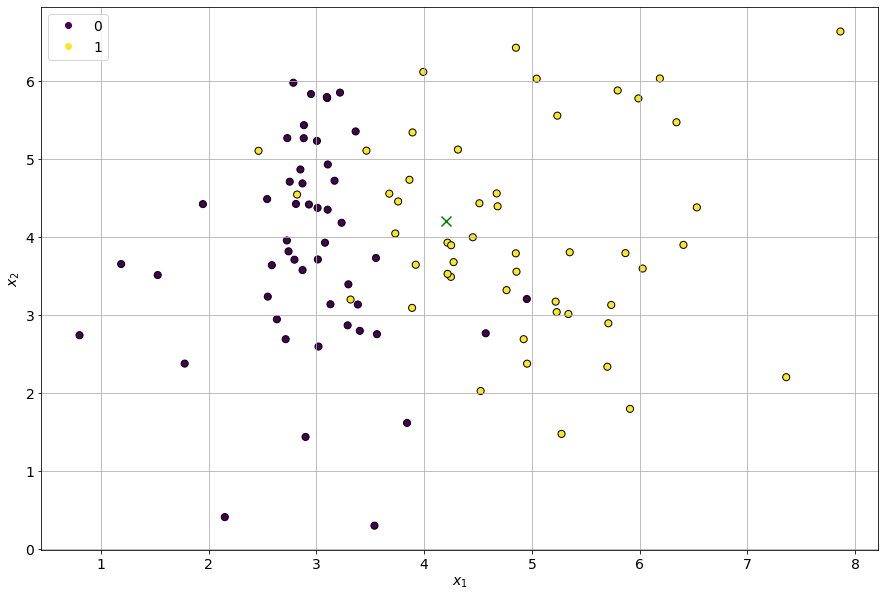

In [86]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
    shift=[4, 4]
)

X_new = np.array([[4.2, 4.2]])

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', s=100, edgecolor='k', c='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [87]:
X_data.shape, y_data.shape

((100, 2), (100,))

In [88]:
X_data[:3]

array([[3.23394531, 4.18332468],
       [3.07961675, 3.9276832 ],
       [3.01341491, 3.71308   ]])

In [89]:
y_data[:3]

array([0, 0, 0])

In [90]:
np.unique(y_data)

array([0, 1])

# Логистическая регрессия

Для отображения функции сигмоиды реализуем недостающую функцию sigmoid():

In [91]:
# Функция сигмоида
def sigmoid(z):
  sgm=1/(1+np.exp(-z))
  return sgm

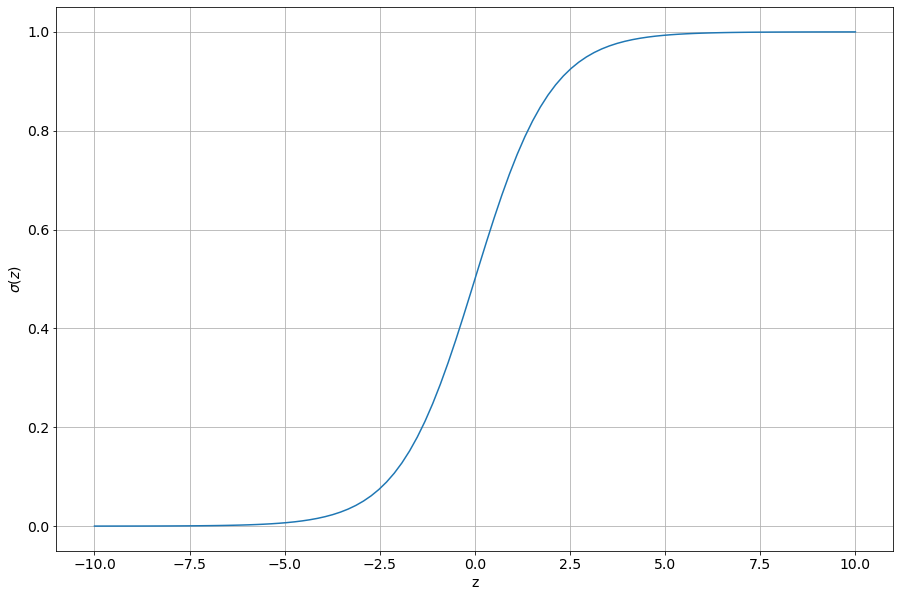

In [92]:
# Проверка функции сигмоид
X = np.linspace(-10, 10, 100)
Y=sigmoid(X)

plt.plot(X, Y)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.grid()

# Функция предсказания

In [93]:
# TODO -функция линейной регрессии
def predict_linreg(X, W):
    X=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    z=X@W
    return z

In [94]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [3, 4],
    [2, 3],
    [0, 1]
])
y_true = np.array([19, 14, 4])
y_pred = predict_linreg(X, W)

assert np.all(y_true == y_pred)

После этого, напишем реализацию функции предсказания степени уверенности:

In [95]:
# TODO -  Функция предсказания степени уверенности
def predict_proba(X, W):
    z=predict_linreg(X,W)
    y=sigmoid(z)
    return y

In [96]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([0.999088, 0.01798, 0.1192])
y_pred = predict_proba(X, W)

# Проверка сделана через близость значений из-за округлений
assert np.all(np.abs(y_true-y_pred) < 1e-5)

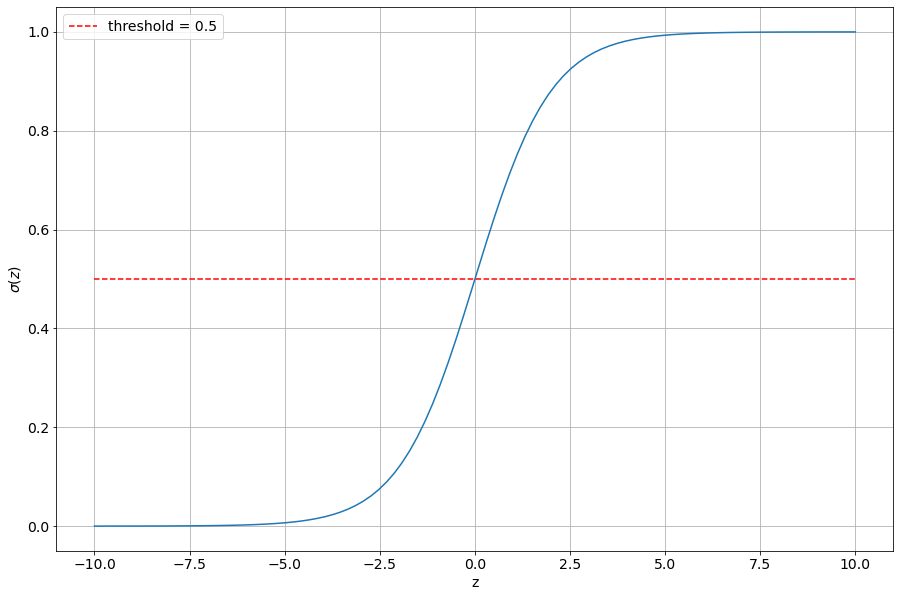

In [97]:
# Предел разделения сигмоиды на 1-да и 0-нет
X = np.linspace(-10, 10, 100)
Y = sigmoid(X)
Y_thrsh = np.full_like(X, 0.5)

plt.plot(X, Y)
plt.plot(X, Y_thrsh, 'r--', label='threshold = 0.5')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.legend()
plt.grid()

In [98]:
# TODO - функция конечного предсказания
#         результат должен содержать присвоенный класс
def predict(X, W, threshold):
  y_cls=[]
  z=predict_linreg(X,W)
  y=sigmoid(z)
  a=y>threshold
  y_cls=a.astype(int)
  return y_cls

In [99]:
# Проверим на паре тестов
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([1, 0, 0])
y_pred = predict(X, W, 0.5)

assert np.all(y_true == y_pred)

# Визуализация предсказаний

In [100]:
#Функция визуализации предсказаний
def plot_2d_decision_boundary(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict_proba(np.c_[xx.ravel(), yy.ravel()], W)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()

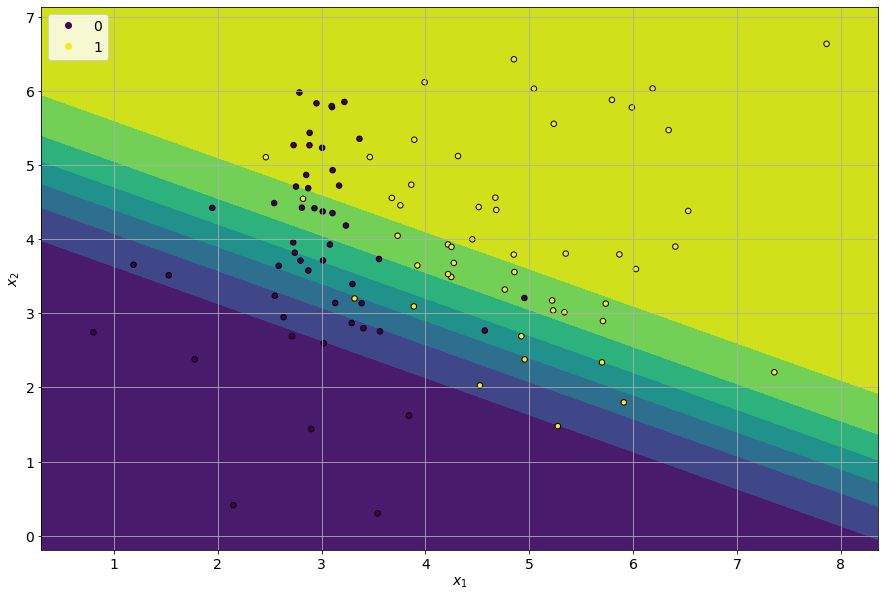

In [101]:
# Выберем случайные веса и установим переменные
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary(X_data, rand_W, y_data)

# Задание
Замените функцию predict_proba() на predict() (создав новую функцию отображения), отобразите данные и постарайтесь описать, почему изменился результат отображения:

In [102]:
def plot_2d_decision_boundary1(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict(np.c_[xx.ravel(), yy.ravel()], W, 0.5)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()


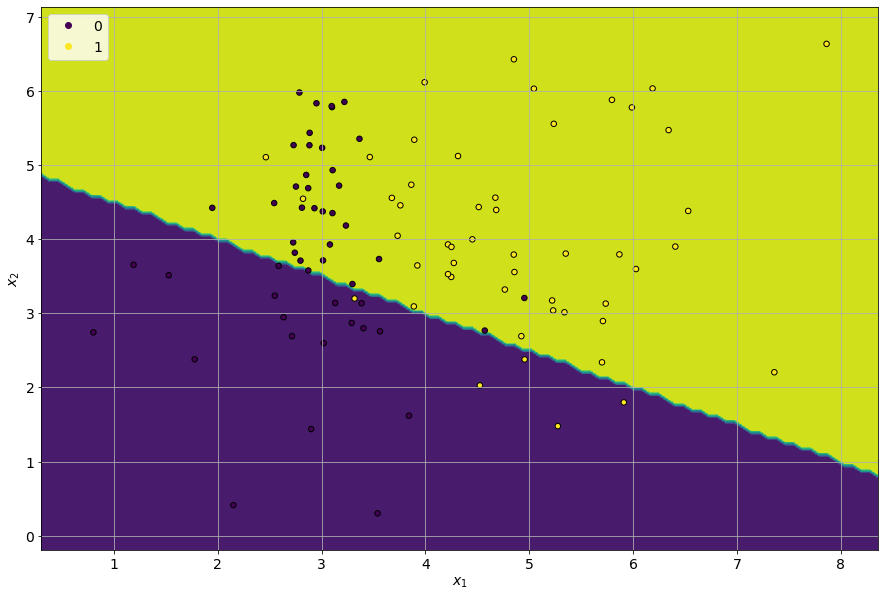

In [103]:
# Выберем случайные веса и установим переменные
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary1(X_data, rand_W, y_data)

# **Метрики**

In [104]:
# TODO - реализуйте функцию получения показателей
def get_truefalse_metrics(y_true, y_pred):
    TP=np.sum((y_true==1)&(y_pred==1))
    TN=np.sum((y_true==0)&(y_pred==0))
    FP=np.sum((y_true==0)&(y_pred==1))
    FN=np.sum((y_true==1)&(y_pred==0))
    return TP, TN, FP, FN

In [105]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
assert np.all([TP == 3, TN == 4, FP == 2, FN == 5])

# Матрица ошибок

In [106]:
# TODO - постройте матрицу ошибок в виде 2D квадратного массива
def get_confusion_matrix(y_true, y_pred):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    conf_matrix=([TN,FP],[FN,TP])
    return conf_matrix

In [107]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

conf_matrix = get_confusion_matrix(y_true, y_pred)
assert np.all(conf_matrix == np.array([[4, 2], [5, 3]]))

In [108]:
def show_confusion_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Предсказанное')
    plt.ylabel('Истинное')
    plt.show()

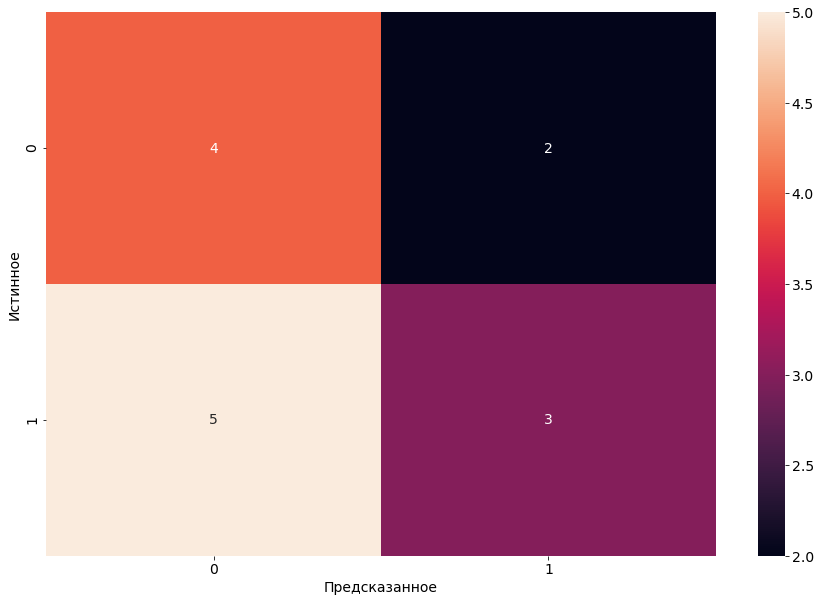

In [109]:
show_confusion_matrix(conf_matrix)


# Задание
Произведите предсказание классов на данных X_data и отобразите результаты предсказания в виде матрицы ошибок.

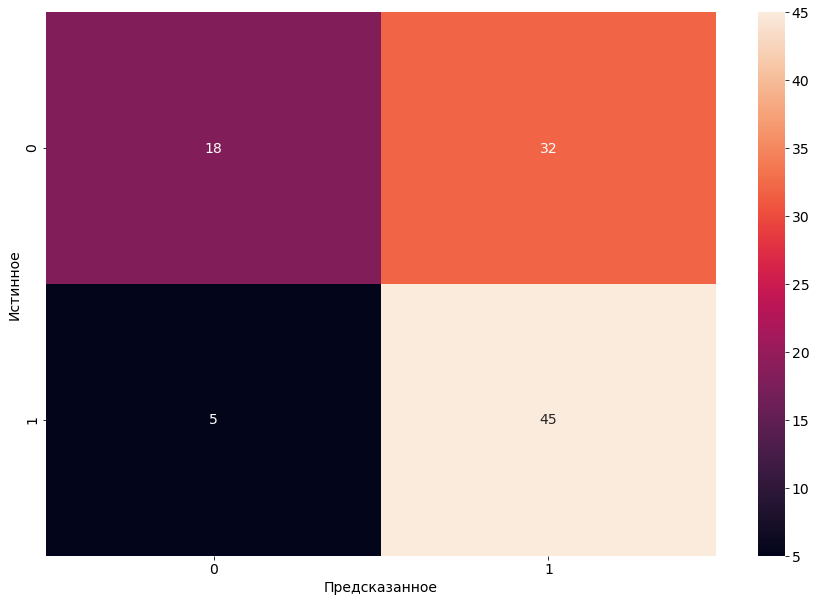

In [110]:
# TODO - используйте rand_W для предсказания

rand_W = [-10, 1, 2]
X = X_data
y_true = y_data
y_pred = predict(X, rand_W, 0.5)
conf_matrix=get_confusion_matrix(y_true, y_pred)
show_confusion_matrix(conf_matrix)



# Достоверность, точность, полнота, F-мера (Accuracy, Precision, Recall, F1)¶

In [111]:
def calculate_accuracy(y_true, y_pred):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    acc=(TP+TN)/(TP+TN+FP+FN)
    return acc
def calculate_recall_precision_f1(y_true, y_pred, class_index):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)

    '''
    class_index - Индекс класса для которого делается оценка показателей
    '''
    if class_index==1:
      precision=TP/(TP+FP)
      recall=TP/(TP+FN)
    if class_index==0:
      precision=TN/(TN+FN)
      recall=TN/(TN+FP)
    f1=2*(recall*precision)/(recall+precision)
    return recall, precision, f1

In [112]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

acc = calculate_accuracy(y_true, y_pred)
recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
print(f'Accuracy: {acc}')

assert np.all([acc == 0.5, recall_1 == 0.375, precision_1 == 0.6])

Class 1 metrics: (0.375, 0.6, 0.4615384615384615)
Class 0 metrics: (0.6666666666666666, 0.4444444444444444, 0.5333333333333333)
Accuracy: 0.5


In [113]:
def show_classification_metrics(y_true, y_pred):
    acc = calculate_accuracy(y_true, y_pred)
    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

    print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
    print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
    print(f'Accuracy: {acc}')

In [114]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (1.0, 0.7, 0.8235294117647058)
Class 0 metrics: (0.5714285714285714, 1.0, 0.7272727272727273)
Accuracy: 0.7857142857142857


In [115]:

y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.42857142857142855, 1.0, 0.6)
Class 0 metrics: (1.0, 0.6363636363636364, 0.7777777777777778)
Accuracy: 0.7142857142857143


# **Разделение данных на обучение/тест со стратификацией**

In [116]:
# TODO - функция сплита со стратификацией
def train_test_split_stratified(X, y, test_size):
    # Объединим X и y, чтобы работать с одним массивом
    Xy=np.concatenate((X,y.reshape(len(y),1)),axis=1)
    # Создадим листы Xy_train и Xy_test, в которые будем формировать выборки
    Xy_train=list()
    Xy_test=list()
    #Получение уникальных значений (классов)
    uniq=np.unique(Xy[:,-1])
    # Создаем цикл по уникальным значениям (классам) массива y
    #   (так как стратифицируем по целевым классам)
    for i in range(len(uniq)):
      # Получаем индексы записей, у которых значение равно уникальному
      #   значению в итерации (равно выбранному классу в итерации)
      # numpy.where()
      a1=np.where((Xy[:,-1]==uniq[i]),True,False)
      ind=np.array(range(len(y)))
      ind=ind[a1]
      # Перемешиваем индексы, чтобы выборка была случайной
      # numpy.random.permutation()
      ind=np.random.permutation(ind)
      # Умножаем test_size на количество записей класса, чтобы получить количество записе этого класса, которое уходит на тест
      # Не забудьте, что количество должно быть int
      cls_n_test=(int(TEST_SIZE*(len(ind))))
      # Выбираем индексы записей, которые пойдут на тест [:cls_n_test]
      # Остальные индексы пойдут на обучение
      index_test=ind[:cls_n_test]
      index_train=ind[cls_n_test:]
      # Расширяем массив Xy_train данными по индексам для обучения
      Xy_train.extend(Xy[index_train,:])
      # Расширяем массив Xy_test данными по индексам для теста
      Xy_test.extend(Xy[index_test,:])
    # Перемешаем еще раз полученные Xy_train и Xy_test
    Xy_train=np.random.permutation(Xy_train)
    Xy_test=np.random.permutation(Xy_test)
    # Разделим обратно на X_train, X_test, y_train, y_test
    # X - все колонки до последней, y - последняя колонка
    X_train=Xy_train[:,:-1]
    X_test=Xy_test[:,:-1]
    y_train=Xy_train[:,-1]
    y_test=Xy_test[:,-1]
    return X_train, X_test, y_train, y_test

In [117]:
TEST_SIZE = 0.3

X_train, X_test, y_train, y_test = train_test_split_stratified(X_data, y_data, TEST_SIZE)

assert np.all([X_train.shape[0] == 70, X_test.shape[1] == X_data.shape[1], y_test.shape[0] == 30])

In [118]:
y_test.shape


(30,)

In [119]:
# TODO - выполните предсказание с порогом 0.5 и отобразите метрики
rand_W = [-10, 1, 2]
X = X_test
y_true = y_test
y_pred = predict(X, rand_W, 0.5)
show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.8666666666666667, 0.52, 0.65)
Class 0 metrics: (0.2, 0.6, 0.3)
Accuracy: 0.5333333333333333


# **Функция потерь**

<ipython-input-120-b3f46c3d66e0>:2: RuntimeWarning: divide by zero encountered in log
  J_1 = -np.log(Y)
<ipython-input-120-b3f46c3d66e0>:3: RuntimeWarning: divide by zero encountered in log
  J_2 = -np.log(1-Y)


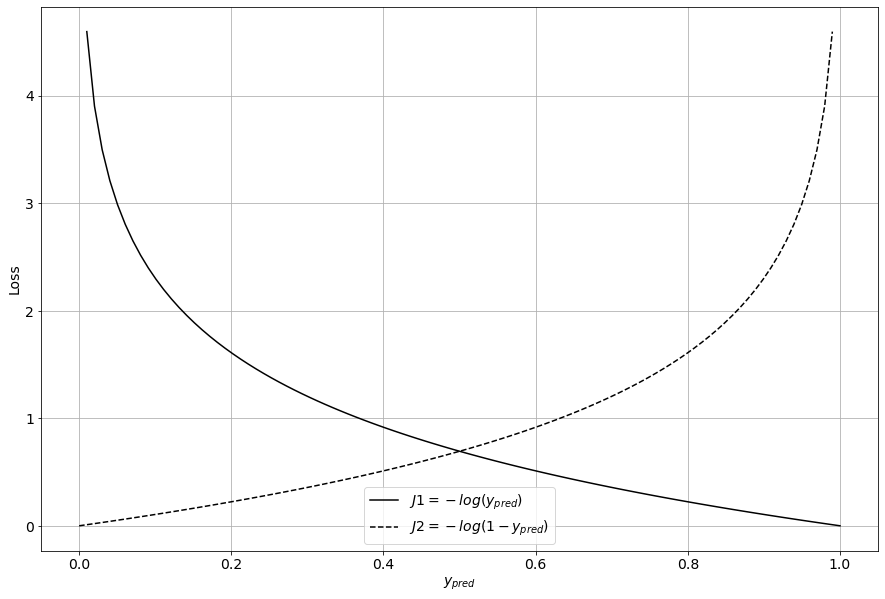

In [120]:
Y = np.linspace(0, 1, 100)
J_1 = -np.log(Y)
J_2 = -np.log(1-Y)

plt.plot(Y, J_1, 'k', Y, J_2, 'k--')
plt.grid()
plt.xlabel('$y_{pred}$')
plt.ylabel('Loss')
plt.legend(['$J1=-log(y_{pred})$', '$J2=-log(1-y_{pred})$'])

In [121]:
# Функция потерь
def bce_loss(y_true, y_pred):
    loss=np.mean(-y_true*(np.log(y_pred))-(1-y_true)*(np.log(1-y_pred)))
    return loss
# Производная функции потерь
def bce_loss_deriv(X, y_true, y_pred):
    dJ=np.mean(np.transpose(X)*(y_pred-y_true),axis=1)
    return dJ

In [122]:
# Проверка
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([0.98, 0.3333, 0.2, 0.8])

X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [8, 9, 0],
    [7, 6, 5],
])

loss = bce_loss(y_true, y_pred)
dJ = bce_loss_deriv(X, y_true, y_pred)

dJ_true = np.array([-1.53835, -1.360025, 0.8183]) 

assert loss == 1.5375048946336445
assert np.all(np.abs(dJ-dJ_true) < 1e-8)

# **Обучение модели**

# Задание

In [123]:
def fit_model(X, y, lr, n_iter):
    y_true=y
    W=np.zeros(X.shape[1]+1)
    loss_history=[]
    y_pred=predict_proba(X,W)
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    for i in range(n_iter):
       dJ=bce_loss_deriv(X1, y_true, y_pred)
       W=W-lr*dJ
       y_pred=predict_proba(X,W)
       loss=bce_loss(y_true, y_pred)
       loss_history.append(loss)
    return W, loss_history


def show_loss(loss_history):
    plt.plot(loss_history)  
    plt.grid()
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.show()

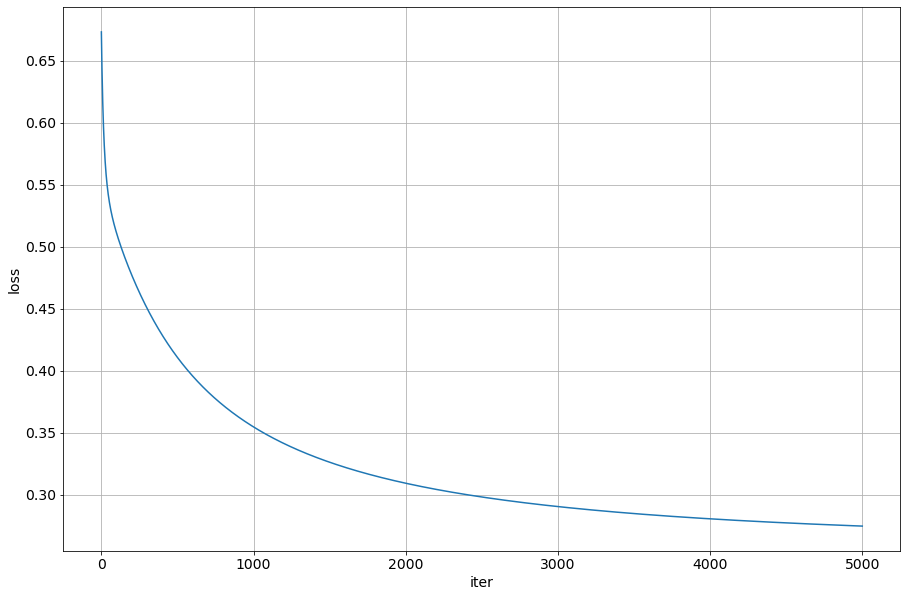

In [124]:
trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train
)

show_loss(loss_history)

In [125]:
# TODO - Отобразите значения метрик
y_pred=predict(X_train,trained_W,0.5)
show_classification_metrics(y_train, y_pred)

Class 1 metrics: (0.9428571428571428, 0.9428571428571428, 0.9428571428571428)
Class 0 metrics: (0.9428571428571428, 0.9428571428571428, 0.9428571428571428)
Accuracy: 0.9428571428571428


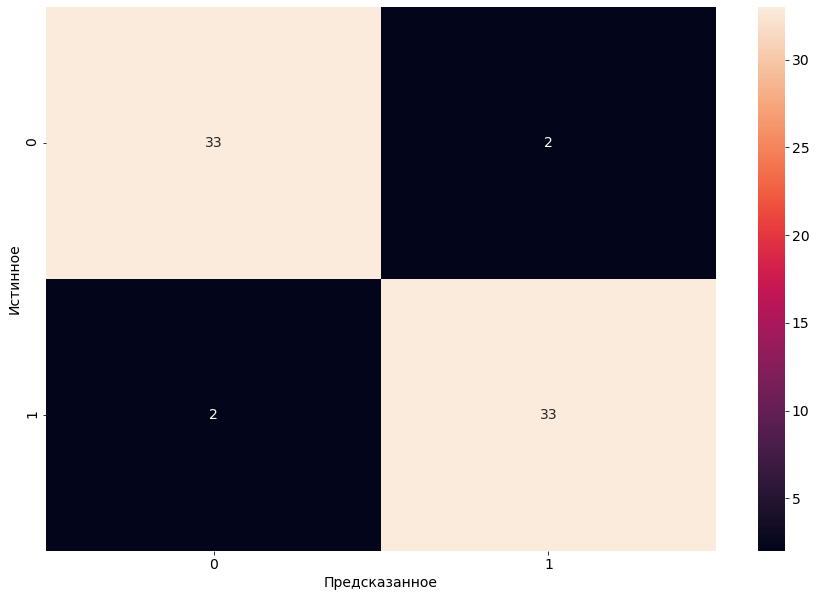

In [126]:
# TODO - Отобразите матрицу ошибок
conf_matrix=get_confusion_matrix(y_train, y_pred)
show_confusion_matrix(conf_matrix)

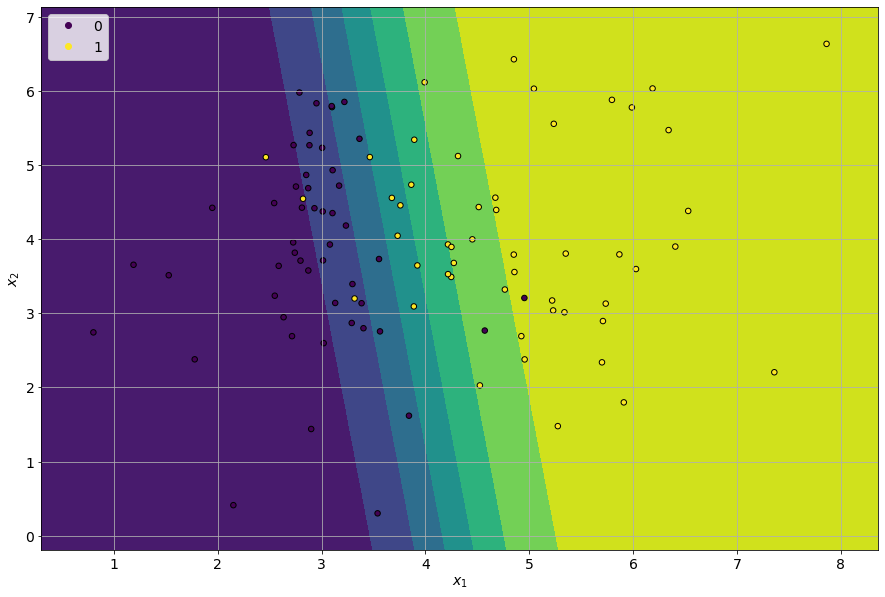

In [127]:
plot_2d_decision_boundary(X_data, trained_W, y_data)

# Задание
Изучите, как меняются показатели в зависимости от выбранного порога (7 разных значений в диапазоне $[0.1; 0.95]$.

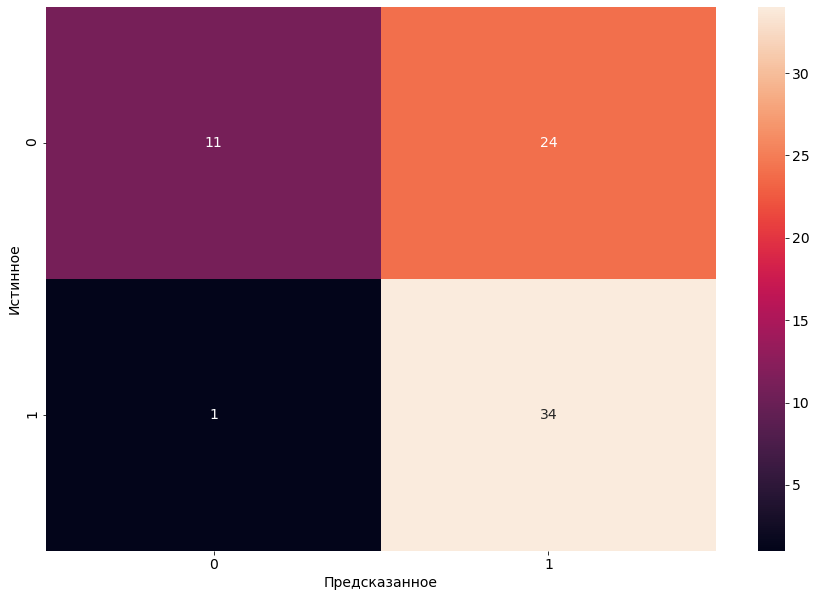

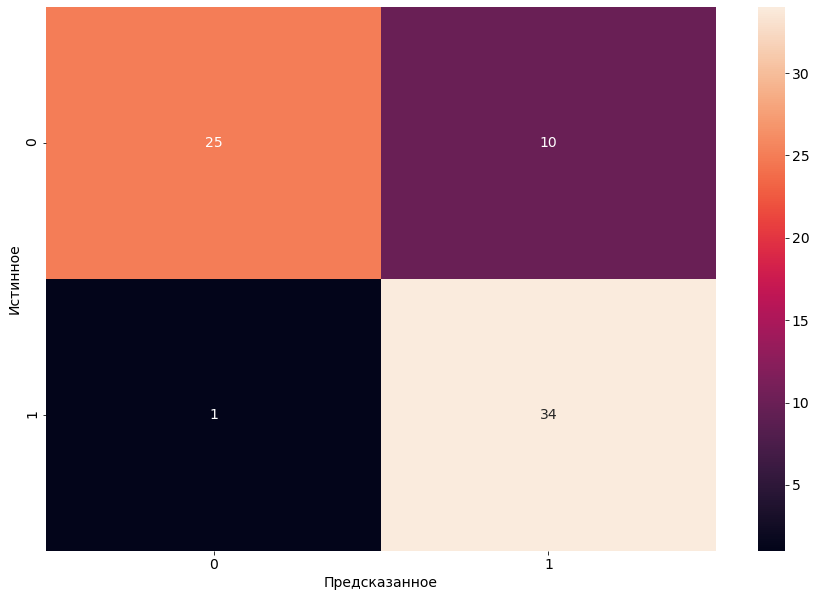

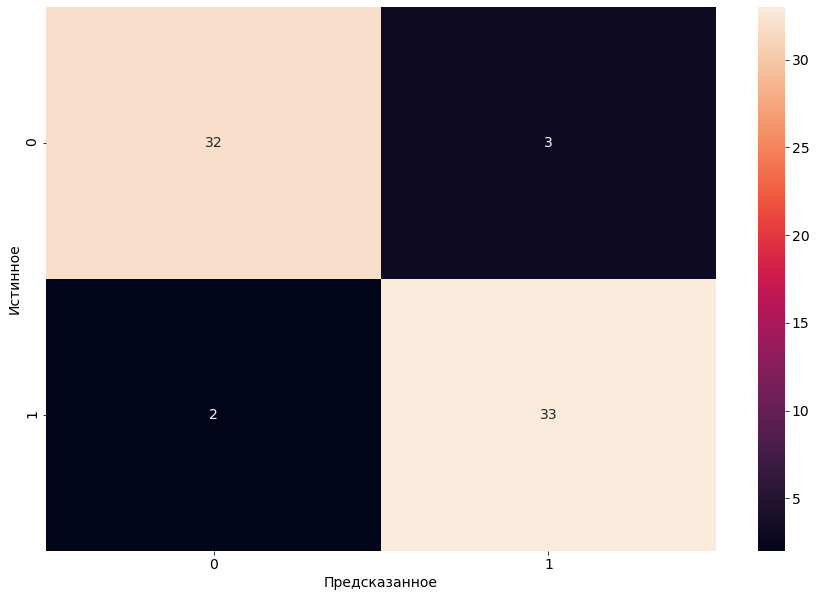

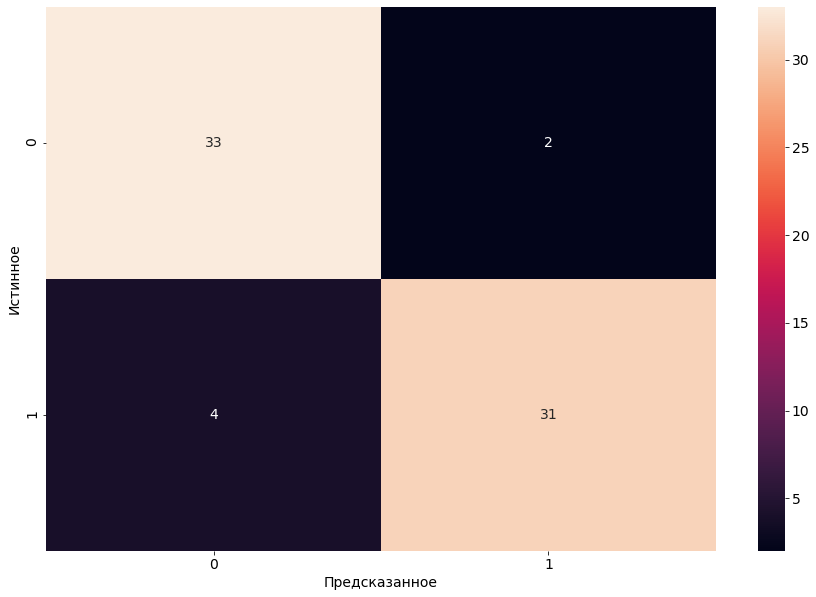

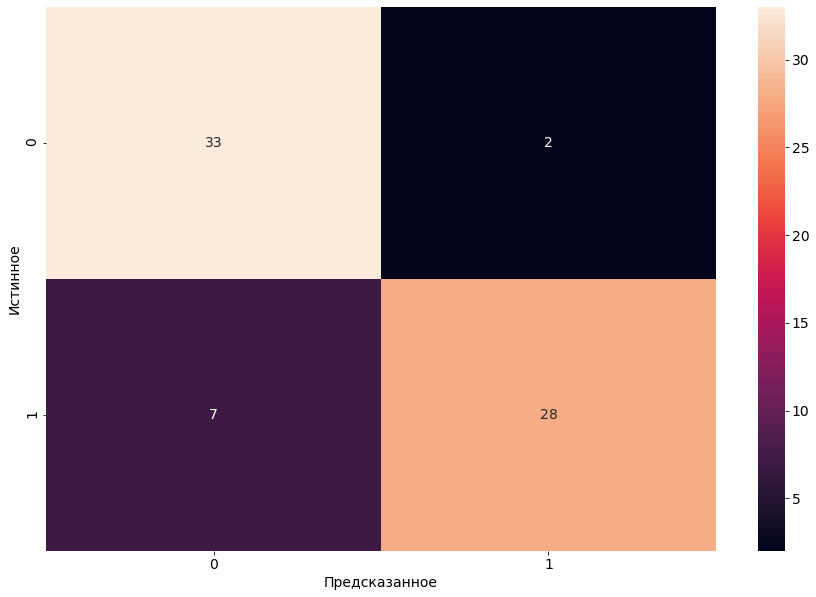

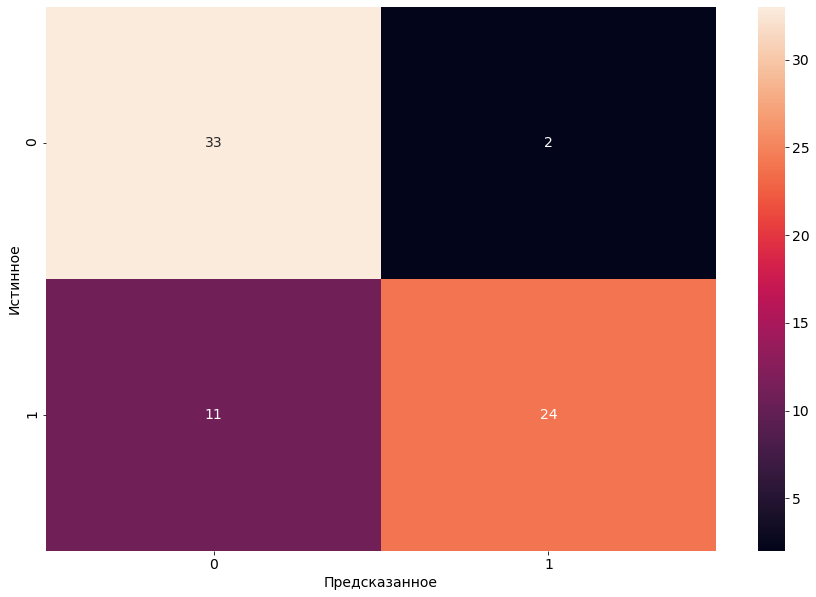

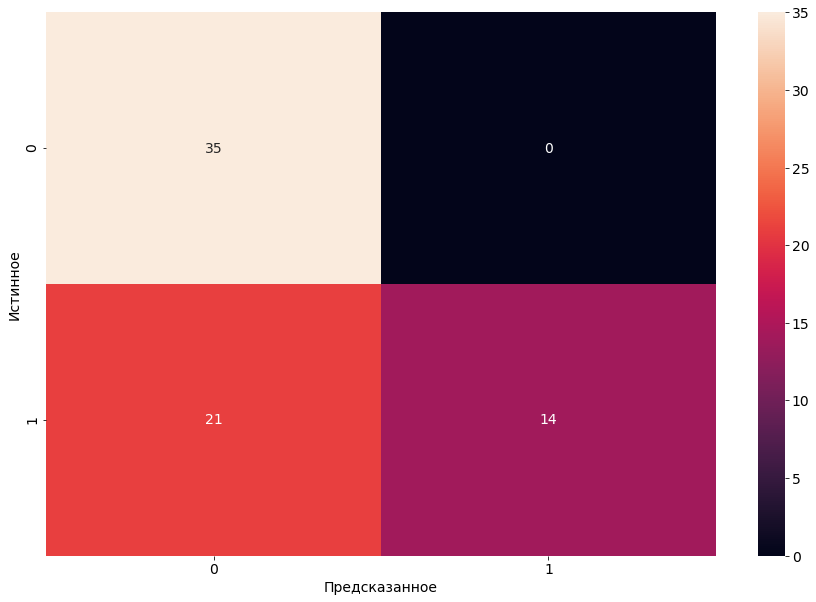

In [128]:
for i in np.linspace(0.1,0.95,7):
    y_pred=predict(X_train,trained_W,i)
    conf_matrix=get_confusion_matrix(y_train, y_pred)
    show_confusion_matrix(conf_matrix)

**ROC кривая и AUC**

In [129]:
# TODO - напишите функции получения TRP и FPR

def get_tpr_fpr_metrics(y_true, y_pred, class_index):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    if class_index==1:
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
    if class_index==0:
        TPR=FP/(FP+TN)
        FPR=TP/(TP+FN)
    return TPR, FPR

In [130]:
# TEST
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

tpr_0, fpr_0 = get_tpr_fpr_metrics(y_true, y_pred, 0)

assert np.isclose(tpr_0, 0.5)
assert np.isclose(fpr_0, 0.5)

In [131]:
def show_roc_curve(X, y, W, class_index):
    diag_values = np.array([
        [0, 0],
        [1, 1],
    ])

    render_n_points = 10
    threshold_values = np.arange(render_n_points+1)/render_n_points
    tpr_values = []
    fpr_values = []

    for threshold_value in threshold_values:
        y_pred = predict(X, W, threshold=threshold_value)
        tpr_0, fpr_0 = get_tpr_fpr_metrics(y, y_pred, class_index)

        tpr_values.append(tpr_0)
        fpr_values.append(fpr_0)

    plt.plot(fpr_values, tpr_values)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)

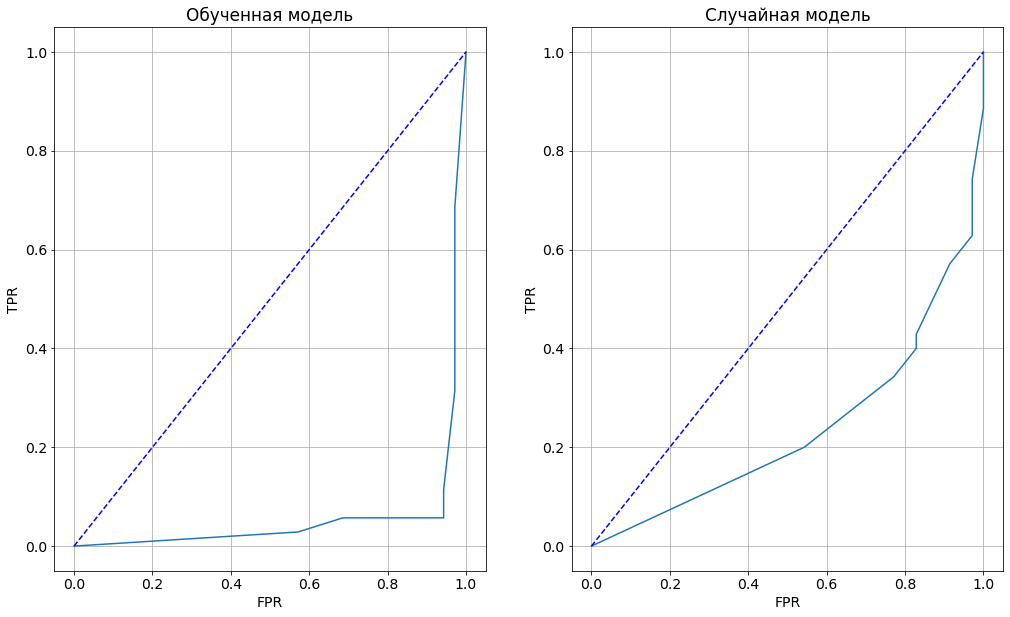

In [132]:
plt.figure(figsize=[17,10])
plt.subplot(121)
show_roc_curve(X_train, y_train, trained_W, class_index=0)
plt.title('Обученная модель')
plt.subplot(122)
show_roc_curve(X_train, y_train, rand_W, class_index=0)
plt.title('Случайная модель')
plt.show()

# Задание - PR-кривая¶

In [133]:
def show_pr_curve(X, y, W, class_index):
    render_n_points = 10
    threshold_values = np.arange(render_n_points+1)/render_n_points
    recall_values = []
    precision_values = []

    for threshold_value in threshold_values:
        y_pred = predict(X, W, threshold=threshold_value)
        recall, precision, f1 = calculate_recall_precision_f1(y, y_pred, class_index)
        recall_values.append(recall)
        precision_values.append(precision)

    plt.plot(recall_values, precision_values)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.grid(True)

<ipython-input-111-a53e180fd14f>:15: RuntimeWarning: invalid value encountered in long_scalars
  precision=TN/(TN+FN)


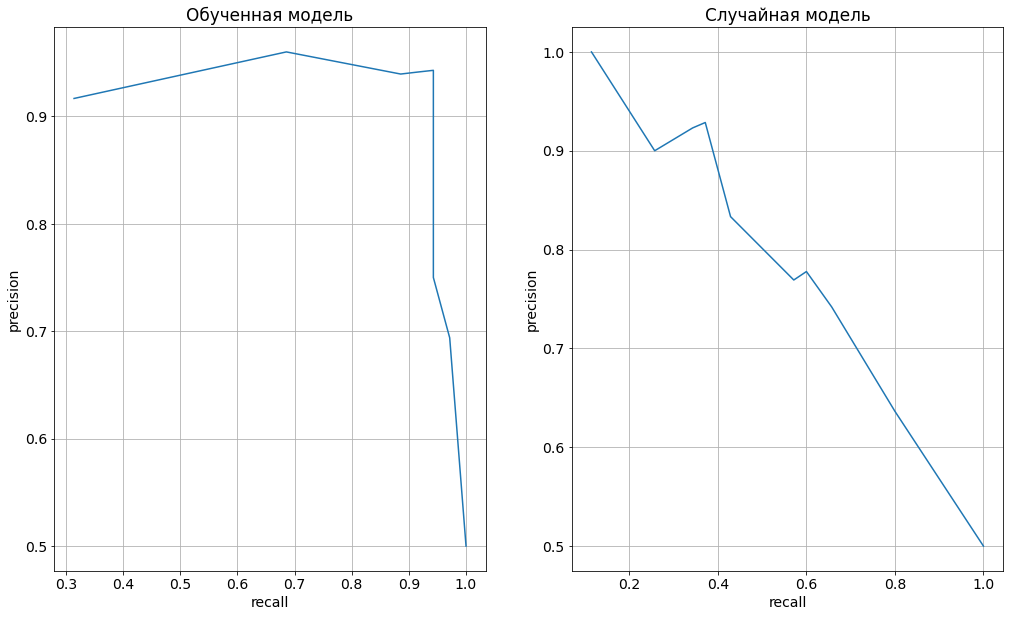

In [134]:
plt.figure(figsize=[17,10])
plt.subplot(121)
show_pr_curve(X_train, y_train, trained_W, class_index=0)
plt.title('Обученная модель')
plt.subplot(122)
show_pr_curve(X_train, y_train, rand_W, class_index=0)
plt.title('Случайная модель')
plt.show()

# **Кросс-валидация**

In [135]:
# TODO - напишите реализацию K-fold разделения
def get_kfold_splits(n_samples, kfolds):
    ''' Функция получения индексов для разделения на K фолдов
    
    Параметры
    ---------
    n_samples: int
        Количество записей в данных
    k: int
        Количество фолдов
    
    Возвращает
    ----------
    Список, в котором находится k пар (кортежей)
        Каждая пара представляет собой два массива:
        - массив индексов обучающей выборки
        - массив индексов тестовой выборки
    '''
    folds_indexes = []
    # Создайте список перемешанных индексов записей
    #   numpy.random.permutation(range(n_samples))
    mixed_ind=np.random.permutation(range(n_samples))
    # Получите размер фолда
    #   n_samples/kfolds
    step=n_samples/kfolds

    for i in range(kfolds):
        # Получите индекс начала тестового фолда
        start_idx = int(i*step)
        # Получите индекс конца тестового фолда
        end_idx= int (i*step+step)

        # Создайте массив нулей с типом bool
        # Это будет маска для выбора индексов обучения/теста
        mask=np.zeros(X_data.shape[0],dtype=bool)


        # По диапазону индексов тестового фолда запишите True в маску
        #   [start_idx:end_idx] = True
        mask[start_idx:end_idx] = True

        # По маске из перемешанных индексов получите индексы тестового фолда
        #   test_indexes
        test_indexes=mixed_ind[mask]
        
        # По инвертированной маске из перемешанных индексов 
        #   получите индексы обучающего фолда
        #   train_indexes
        train_indexes=mixed_ind[~mask]

        # Запишем пару массивов индексов в результирующий список
        folds_indexes.append(
            (train_indexes, test_indexes)
        )

    return folds_indexes

In [136]:
# TODO - напишите процесс обучения и оценки с K-fold CV

K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits(X_data.shape[0], K_FOLDS):
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_data[train_indexes,:]
    X_test=X_data[test_indexes,:]
    y_train=y_data[train_indexes]
    y_test=y_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train)

    y_pred=predict(X_test,trained_W,0.5)

    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_test, y_pred, 1)
    f1_scores.append(f1_1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_scores.append(f1_0)
    f1_scores.append(f1_1)
# Получите среднее значение по массиву f1_scores
print(np.mean(f1_scores))

0.9184922301491153


# **Дисбаланс классов в данных**

In [137]:
y_data[y_data == 0].shape, y_data[y_data == 1].shape

((50,), (50,))

In [138]:
y_true = np.zeros(100, dtype=int)
y_true[:3] = 1

y_pred = np.zeros(100, dtype=int)

y_true, y_pred

(array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [139]:
show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.0, nan, nan)
Class 0 metrics: (1.0, 0.97, 0.9847715736040609)
Accuracy: 0.97


<ipython-input-111-a53e180fd14f>:12: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)


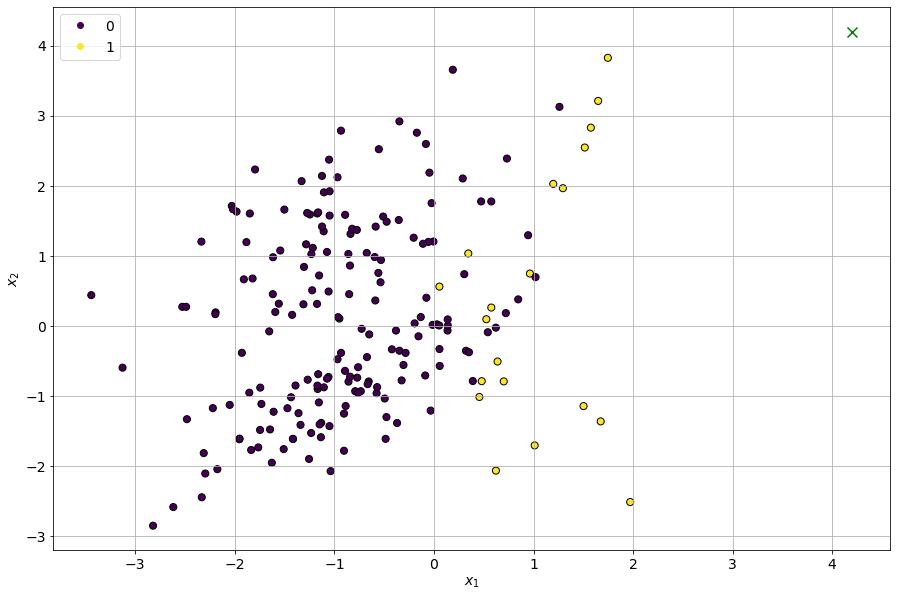

In [140]:
X_data, y_data = make_classification(
    n_samples=200,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
    weights=[0.9, 0.1]
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', s=100, edgecolor='k', c='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [141]:
y_data[y_data == 0].shape, y_data[y_data == 1].shape

((180,), (20,))

# Задание

In [142]:
# TODO - разберите вместе с преподавателем
def get_kfold_splits_stratified(y, kfolds):
    ''' Функция получения индексов для разделения на K фолдов
            со стратификацией по y
    
    Параметры
    ---------
    y: [n_samples]
        Вектор целевых классов, по которому будет производиться стратификация
    k: int
        Количество фолдов
    
    Возвращает
    ----------
    Список, в котором находится k пар (кортежей)
        Каждая пара представляет собой два массива:
        - массив индексов обучающей выборки
        - массив индексов тестовой выборки
    '''
    folds_indexes = []
    n_samples = len(y)
    step = n_samples/kfolds

    classes_indices = {}
    unique_classes = np.unique(y)
    for k in unique_classes:
        class_indices = np.where(y==k)[0]
        class_indices = np.random.permutation(class_indices)
        classes_indices[k] = class_indices

    for i in range(kfolds):
        test_indexes = []
        train_indexes = []

        for k in unique_classes:
            class_indices = classes_indices[k]
            step = len(class_indices)/kfolds

            start_idx = int(i*step)
            end_idx = int((i+1)*step)          

            mask = np.zeros_like(class_indices, dtype=bool)
            mask[start_idx:end_idx] = True

            test_indexes.extend(class_indices[mask])
            train_indexes.extend(class_indices[~mask])
        
        train_indexes = np.random.permutation(train_indexes)
        test_indexes = np.random.permutation(test_indexes)

        folds_indexes.append(
            (train_indexes, test_indexes)
        )

    return folds_indexes

In [143]:
# Проверка
folds = get_kfold_splits_stratified(y_data, K_FOLDS)

fold = folds[2]
test_indexes = fold[1]

assert  (y_data[test_indexes] == 1).sum() == 4

In [144]:
# TODO - напишите реализацию обучения со стратификацией CV
K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits_stratified(y_data, K_FOLDS):
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_data[train_indexes,:]
    X_test=X_data[test_indexes,:]
    y_train=y_data[train_indexes]
    y_test=y_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train)

    y_pred=predict(X_test,trained_W,0.5)

    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_test, y_pred, 1)
    f1_scores.append(f1_1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_scores.append(f1_0)
    f1_scores.append(f1_1)
# Получите среднее значение по массиву f1_scores
print(np.mean(f1_scores))

0.81040953993877


In [145]:
# TODO - напишите реализацию метода oversample
def oversample_by_class(X, y, oversample_class, target_count):
    index1=np.arange(len(y))[y==oversample_class]
    ind1=np.random.choice(index1,target_count-len(index1))
    y_new=y[ind1]
    X_new=X[ind1,:]
    y=np.concatenate((y,y_new))
    X=np.concatenate((X,X_new))
    return X, y

In [146]:
# Проверка
X_check, y_check = oversample_by_class(X_data, y_data, 1, 200)

assert (y_check==1).sum() == 200

In [147]:
class0_count = (y_data==0).sum()
X_new_data, y_new_data = oversample_by_class(X_data, y_data, 1, class0_count)

K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits_stratified(y_new_data, K_FOLDS):
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_new_data[train_indexes,:]
    X_test=X_new_data[test_indexes,:]
    y_train=y_new_data[train_indexes]
    y_test=y_new_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train)

    y_pred=predict(X_test,trained_W,0.5)

    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_test, y_pred, 1)
    f1_scores.append(f1_1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_scores.append(f1_0)
    f1_scores.append(f1_1)
# Получите среднее значение по массиву f1_scores
print(np.mean(f1_scores))


0.9214325642631935


In [148]:
# TODO - напишите реализацию метода undersample
def undersample_by_class(X, y, undersample_class, target_count):
    index1=np.arange(len(X))[~(y==undersample_class)]
    index0=np.arange(len(X))[y==undersample_class]
    ind0=np.random.choice(index0,target_count)
    ind=np.concatenate((index1,ind0))
    X=X[ind,:]
    y=y[ind]
    return X, y

In [149]:
# Проверка
X_check, y_check = undersample_by_class(X_data, y_data, 0, 200)

assert (y_check==0).sum() == 200

In [150]:
class1_count = (y_data==1).sum()
X_new_data, y_new_data = undersample_by_class(X_data, y_data, 0, class1_count)

K_FOLDS = 5
f1_scores = []

for train_indexes, test_indexes in get_kfold_splits_stratified(y_new_data, K_FOLDS):
    # По индексам фолдов получите 
    #   {X,y}_{train,test} из данных X_data
    X_train=X_new_data[train_indexes,:]
    X_test=X_new_data[test_indexes,:]
    y_train=y_new_data[train_indexes]
    y_test=y_new_data[test_indexes]

    # Произведите обучение модели, оцените на тестовом фолде
    #   и получите среднее значение f1 по всем классам, 
    #   добавьте значение в массив f1_scores
    trained_W, loss_history = fit_model(
    lr=0.1,
    n_iter=5000,
    X=X_train,
    y=y_train)

    y_pred=predict(X_test,trained_W,0.5)

    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_test, y_pred, 1)
    f1_scores.append(f1_1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_test, y_pred, 0)
    f1_scores.append(f1_0)
    f1_scores.append(f1_1)
# Получите среднее значение по массиву f1_scores
print(np.mean(f1_scores))

0.9492063492063493
